# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# ! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

44

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key +  "&q="
base_url
response = requests.get(base_url).json()
response


{'cod': '400', 'message': 'Nothing to geocode'}

In [ ]:
# {'coord': {'lon': -79.2353, 'lat': 42.097},
#  'weather': [{'id': 801,
#    'main': 'Clouds',
#    'description': 'few clouds',
#    'icon': '02n'}],
#  'base': 'stations',
#  'main': {'temp': 287.52,
#   'feels_like': 283.83,
#   'temp_min': 285.37,
#   'temp_max': 288.71,
#   'pressure': 1011,
#   'humidity': 72},
#  'visibility': 10000,
#  'wind': {'speed': 5.1, 'deg': 171, 'gust': 12.81},
#  'clouds': {'all': 20},
#  'dt': 1616634795,
#  'sys': {'type': 1,
#   'id': 4588,
#   'country': 'US',
#   'sunrise': 1616584370,
#   'sunset': 1616628796},
#  'timezone': -14400,
#  'id': 5122534,
#  'name': 'Jamestown',
#  'cod': 200}


In [20]:
# Starting URL for Weather Map API Call

city_info = []
# temps = []
# humid = []
# cloudiness = []
# wind_speed = []
# lats = []

#create query url
for city in cities:
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    response = requests.get(query).json()
    
    try:
        
        name = response['name']
        
        temp = response['main']['temp_max']

        hum = response['main']['humidity']
       
        cloud = response['clouds']['all']
        
        wind = response['wind']['speed']
        
        lon = response['coord']['lon']
        
        lat = response['coord']['lat']
        
        city_info.append({"City Name": name, "Temperature": temp, "Humidity": hum, "Cloudiness": cloud, "Wind": wind, "Longitude": lon, "Latitude": lat})
        
    except KeyError:
        print("City is not found")
        
city_info

City is not found
City is not found


[{'City Name': 'Lompoc',
  'Temperature': 59,
  'Humidity': 55,
  'Cloudiness': 20,
  'Wind': 11.5,
  'Longitude': -120.4579,
  'Latitude': 34.6391},
 {'City Name': 'Maningrida',
  'Temperature': 86.68,
  'Humidity': 68,
  'Cloudiness': 98,
  'Wind': 4.18,
  'Longitude': 134.2667,
  'Latitude': -12.0667},
 {'City Name': 'Pevek',
  'Temperature': -10.59,
  'Humidity': 89,
  'Cloudiness': 100,
  'Wind': 2.08,
  'Longitude': 170.3133,
  'Latitude': 69.7008},
 {'City Name': 'Cheney',
  'Temperature': 42.8,
  'Humidity': 81,
  'Cloudiness': 90,
  'Wind': 9.22,
  'Longitude': -117.5758,
  'Latitude': 47.4874},
 {'City Name': 'Vaini',
  'Temperature': 75.2,
  'Humidity': 94,
  'Cloudiness': 90,
  'Wind': 14.97,
  'Longitude': -175.2,
  'Latitude': -21.2},
 {'City Name': 'Ushuaia',
  'Temperature': 42.8,
  'Humidity': 75,
  'Cloudiness': 20,
  'Wind': 28.77,
  'Longitude': -68.3,
  'Latitude': -54.8},
 {'City Name': 'Kjøpsvik',
  'Temperature': 37.99,
  'Humidity': 93,
  'Cloudiness': 100,
  '

In [19]:
# all_info = []
# df = pd.DataFrame()

# for city in cities: 
#     url = base_url + city 
#     city_weather = requests.get(url).json()
#     try:
#         city_lon = city_weather["coord"]["lon"]
#         city_lan = city_weather["coord"]["lat"]
#         city_temperature_min = city_weather["main"]["temp_min"]
#         city_temperature_max = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_cloud = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
        
        
#         all_info.append({"Lon": city_lon, "Lat": city_lan})
#         all_info.append({"Min Temp": city_temperature_min, "Max temp": city_temperature_max})
#         all_info.append({"Humidity": city_humudity})
#         all_info.append({"Cloudiness": city_cloud})
#         all_info.append({"Wind": city_wind})
        
#         append.temp_df(df)
#     except Exception as e:
#         print(e)

# city_info

name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
'coord'
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
name 'temp_df' is not defined
'c

[]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame(city_info)
# weather_df

new_output = "output_data/new_cities.csv"
weather_df.to_csv(new_output, index_label= "ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
weather_df

,City Name,Temperature,Humidity,Cloudiness,Wind,Longitude,Latitude
0,Lompoc,59.00,55,20,11.50,-120.4579,34.6391
1,Maningrida,86.68,68,98,4.18,134.2667,-12.0667
2,Pevek,-10.59,89,100,2.08,170.3133,69.7008
3,Cheney,42.80,81,90,9.22,-117.5758,47.4874
4,Vaini,75.20,94,90,14.97,-175.2000,-21.2000
5,Ushuaia,42.80,75,20,28.77,-68.3000,-54.8000
6,Kjøpsvik,37.99,93,100,13.80,16.3742,68.0970
7,Hithadhoo,82.98,70,91,10.74,73.0833,-0.6000
8,La Ronge,24.80,58,100,11.50,-105.2842,55.1001
9,Kloulklubed,84.20,79,75,10.36,134.2556,7.0419


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# Not applicable


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

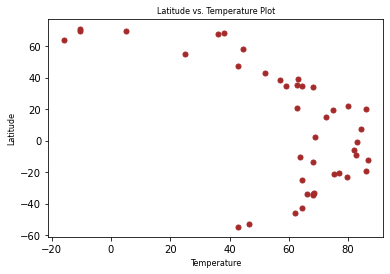

In [33]:
marker_size=12
plt.scatter(weather_df['Temperature'],weather_df['Latitude'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Temperature Plot',fontsize =8)
plt.xlabel('Temperature',fontsize =8)
plt.ylabel('Latitude',fontsize =8)

# Print test
plt.show()

## Latitude vs. Humidity Plot

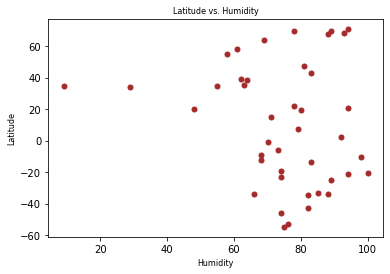

In [35]:
marker_size=12
plt.scatter(weather_df['Humidity'],weather_df['Latitude'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Humidity',fontsize =8)
plt.xlabel('Humidity',fontsize =8)
plt.ylabel('Latitude',fontsize =8)

# Print test
plt.show()

## Latitude vs. Cloudiness Plot

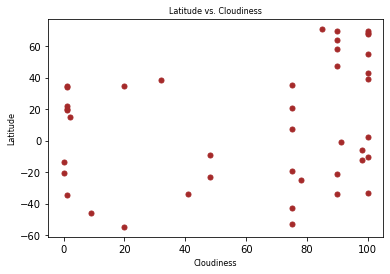

In [36]:
marker_size=12
plt.scatter(weather_df['Cloudiness'],weather_df['Latitude'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Cloudiness',fontsize =8)
plt.xlabel('Cloudiness',fontsize =8)
plt.ylabel('Latitude',fontsize =8)

# Print test
plt.show()

## Latitude vs. Wind Speed Plot

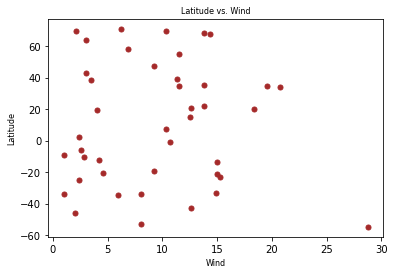

In [37]:
marker_size=12
plt.scatter(weather_df['Wind'],weather_df['Latitude'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Wind',fontsize =8)
plt.xlabel('Wind',fontsize =8)
plt.ylabel('Latitude',fontsize =8)

# Print test
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression